# Data analysis

This notebook goes through the investigation of factors influencing college football attendance for my [final project of Data 512](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)/Assignments#A7:_Final_project_report).

## Introduction

I have always been a huge college football fan so I wanted to do my project on something that I had a passion for, a domain knowledge in, and an area that has a unique mix of quantitative and qualitative information. More specifically, I decided to look into factors influencing attendance at college football games. Attendance is important to the school's reputation, program funding and the gameday experience for fans. Since attendance has been declining lately, this is an important problem to solve, and one that has had many possible contributions addressed but no clear driver. Declining attendance is important to look at through a human-centered lens as it is mutually beneficial to all parties to solve. Human-centered research focuses on an audience, purpose and context (Week 1 Lecture Slides) and I believe this analysis clearly addresses all 3. This analysis can be used by those running college football programs to help boost attendance once they recognize what factors are most important to fans. The purpose is to boost attendance and the context is during NCAA college football games.

---------------------
## Background and related work

College football attendance has been in the decline as of late so much research has been done to investigate what is causing this. Currently, attendance is in a [22-year low](https://techcrunch.com/2019/09/08/as-college-football-attendance-slumps-new-ways-to-ticket-may-hold-an-answer/) and the 2018 season was the [7th time in 8 year that attendance dropped](https://fanbuzz.com/college-football/cfb-attendance-2019/). Many reasons have been tossed around as the cause of this decline from the [use of cell phones](https://frntofficesport.com/college-football-attendance/), to [kickoff times](https://www.offtackleempire.com/2019/7/24/20707199/millennials-terrible-phones-pat-fitzgerald-college-football-attendance-decline-big-ten-media-days), to [dissatisfaction of students](https://ugawire.usatoday.com/2019/03/27/college-football-game-attendance-still-on-the-decline-why-whats-the-solution-how-does-it-relate-to-uga-football/), to a [decrease in stadium capacity due to a focus on more luxury seating](https://www.npr.org/2019/08/24/753962604/attendance-drops-for-college-football) and many more.

This discussion of dropping attendance intrigued me and is what led to me landing on attendance as my area of focus. While the data I have available to me is mainly on game metrics, I decided to supplement this with some weather information to get a better idea of the gameday experience for fans. As a fan myself, I also felt this was a neat outlet for a human-centered focus as it is centered around personal comfort and enjoyment.

My research question is: What factors influence attendance at college football games? My hypotheses are discussed in detail below.

--------------------------
## Methods

The attendance data I use has no personally identifiable information as it is all just raw counts. Much more could be done to look at demographics of attendees but that was not included in this analysis as that data is not publicly available. I decided to exclude all coach and player data from my analysis as well to avoid any ethical concerns of personal data.

My analytical methods include box plots with accompanying [t-tests](https://en.wikipedia.org/wiki/Student%27s_t-test), scatter plots and table generations. The method specifics are discussed in detail below with their corresponding hypothesis.

### Setup

This Jupyter Notebook is created using [Python version 3.7](https://www.python.org/downloads/release/python-370/).

First, I will import the necessary libraries to run the code. The following libraries are used:  
* [scipy](https://www.scipy.org/)  
* [math](https://docs.python.org/3/library/math.html) 
* [numpy 1.17.4](https://numpy.org/)  
* [pandas 0.25.3](https://pandas.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [1]:
from scipy.stats import sem
from scipy.stats import t
from scipy.stats import ttest_ind
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We can increase the font size of matplotlib plots generated later in the notebook to 12 pt to improve clarity:

In [2]:
plt.rcParams.update({'font.size': 12})

We can read in the csv generated in the data_collection notebook:

In [3]:
attendance_data = pd.read_csv("processed_data/seasons_2012-2018_attendance_data.csv")

------------------
## Findings

This section walks through my 6 hypotheses and what I found for each one.

### **What factors influenced attendance rates at College Football games over the 2012 - 2018 seasons?** 

### *H1. Larger stadium capacities have higher percentages of attendance than stadiums that accommodate less people.*

I expected that larger stadiums would have higher attendance percentages than smaller stadiums. To examine this hypothesis, I will create two tables, one for the 5 smallest stadiums and one for the 5 largest stadiums. Then I can see if the larger stadiums seem to have higher attendance percentages.

To generate this analysis, I found a list of all the unique stadiums included in the dataset. For each, I calculated an average attendance percentage, which is the average of the `attendance_percentage` field over all games held at that venue. This then allows us to rank those stadiums by largest and smallest capacities (in number of seats): 

In [4]:
# grab list of unique stadiums in dataset
stadiums = attendance_data["name"].unique()
average_attendance_percentages = []
capacities = []

for stadium in stadiums:
    stadium_rows = attendance_data[attendance_data["name"] == stadium]
    # calculates mean attendance_percentage for that stadium
    average_attendance_percentage = np.mean(stadium_rows["attendance_percentage"])
    capacity = np.mean(stadium_rows["capacity"])
    capacities.append(capacity)
    average_attendance_percentages.append(average_attendance_percentage) 
    
average_attendance_data = pd.DataFrame()
average_attendance_data["name"] = stadiums
average_attendance_data["capacity"] = capacities
average_attendance_data["average_attendance_percentage"] = average_attendance_percentages

##### 5 largest stadiums, by capacity

We can use [panda's `nlargest` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) to grab the 5 rows with the highest values for capacity and then display these in a table:

In [5]:
largest_stadiums = average_attendance_data.nlargest(5, "capacity")
largest_stadiums["rank"] = [1, 2, 3, 4, 5]
largest_stadiums["average_attendance_percentage"] = largest_stadiums["average_attendance_percentage"].round(1)
largest_stadiums[["rank", "name", "capacity", "average_attendance_percentage"]].style.hide_index()

rank,name,capacity,average_attendance_percentage
1,Bristol Motor Speedway,162000,96.9
2,Michigan Stadium,107601,102.3
3,Beaver Stadium,106572,94.2
4,Ohio Stadium,104944,101.3
5,Kyle Field,102733,94.3


##### 5 smallest stadiums, by capacity

We can use [panda's `nsmallest` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html) to grab the 5 rows with the lowest values for capacity and then display these in a table:

In [6]:
smallest_stadiums = average_attendance_data.nsmallest(5, "capacity")
smallest_stadiums["rank"] = [1, 2, 3, 4, 5]
smallest_stadiums["average_attendance_percentage"] = smallest_stadiums["average_attendance_percentage"].round(1)
smallest_stadiums[["rank", "name", "capacity", "average_attendance_percentage"]].style.hide_index()

rank,name,capacity,average_attendance_percentage
1,Jerry Richardson Stadium,15314,86.1
2,Kibbie Dome,16000,76.2
3,Warren McGuirk Alumni Stadium,17000,69.4
4,Foreman Field,20118,100
5,Houchens Industries-L. T. Smith Stadium,22113,77.8


We can see that with the notable exception of Foreman field, the larger stadiums have a higher average attendance percentage. Therefore, my hypothesis does seem to be proved and larger stadiums do have higher attendance rates. There are many underlying factors that can be causing this, such as program funding as it costs a lot of money to build and maintain a large stadium. Therefore, programs with more money to pour into their athletic programs likely have additional benefits that drive up attendance as well such as more students, more alumni, more gameday incentives to attend, better stadium experiences for fans, etc.

------------------------
### *H2. The higher the quality of the home team for the game week, the higher the percentage of attendance.*

I hypothesized that the better the home team is performing at that point in the season, the higher attendance would be. To measure team success, I created an indicator of whether the team was ranked in the [AP Top 25 Poll](https://apnews.com/APTop25CollegeFootballPoll) or not during that week. This indicator is discussed in more detail where it is created in the `data_collection` notebook, but a value of `1` indicates the team was ranked and a value of `0` means the team was unranked when the game took place.

I then created boxplots for games when the home team is ranked and when the home team is unranked using [matplotlib's boxplot function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) with arguments for the data, direction, `gD` for green diamond markers for the outliers, `patch_artist = True` to color the boxes and then labels for the 2 data sources:

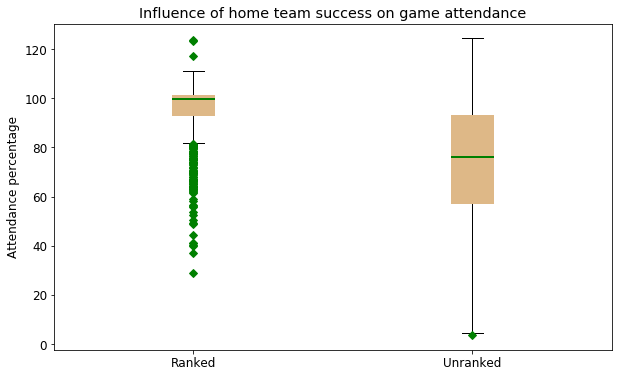

In [7]:
home_team_ranked = attendance_data[attendance_data["home_team_ranked_ind"] == 1]["attendance_percentage"]
home_team_unranked = attendance_data[attendance_data["home_team_ranked_ind"] == 0]["attendance_percentage"]

data = [home_team_ranked, home_team_unranked]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Ranked", "Unranked"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)
    
plt.ylabel("Attendance percentage")
plt.title("Influence of home team success on game attendance")
plt.savefig("visuals/home_team_rank_indicator.jpg")
plt.show()

We can accompany this with a t-test to examine the statistical differences between the two populations of games:

In [8]:
t, p = ttest_ind(home_team_ranked, home_team_unranked, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,0.0,44.229969


You can see from the boxplot that the ranked and unranked matchups appear very different in terms of attendance percentages, with games occurring when the home team is ranked receiving much higher attendances than those when the home team is unranked. The t-test further confirms this hypothesis and we can reject the idea that the attendances are the same at a 0.001 significance level using the p-value which is essentially 0. Therefore, the success of the home team does seem to have a positive influence on attendance.

--------------------
### *H3. The higher the quality of the away team for the game week, the higher the percentage of attendance.*

Similarly, I expected the success of the away team to positively influence game attendance as well. I expected more of the visiting team's fans to travel to the away venue to watch their team play when they are doing well in addition to more of the home team fans showing up to cheer on a potential upset.

Again, I created boxplots using the same functions:

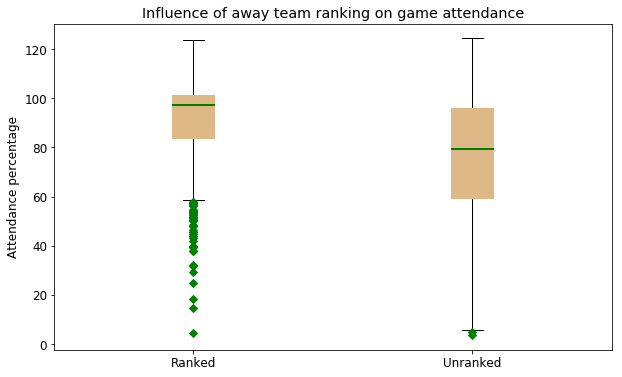

In [9]:
away_team_ranked = attendance_data[attendance_data["away_team_ranked_ind"] == 1]["attendance_percentage"]
away_team_unranked = attendance_data[attendance_data["away_team_ranked_ind"] == 0]["attendance_percentage"]

data = [away_team_ranked, away_team_unranked]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Ranked", "Unranked"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of away team ranking on game attendance")
plt.savefig("visuals/away_team_ranked_indicator.jpg")
plt.show()

I also conducted a t-test on the difference as well:

In [10]:
t, p = ttest_ind(away_team_ranked, away_team_unranked, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,7.904206e-88,21.350052


Again, we can see that attendance does seem to be much higher when the away team is ranked than when they are unranked. The t-test again confirms this and we can reject the idea that attendance is the same for both populations at a .001 confidence level. Looking at the boxplots and p-values, it does appear that the home team's ranking indicator has more of an effect than the away team's. Either way, the data is consistent with both hypotheses.

---------------------
### *H4. Conference matchups have higher percentages of attendance than non-conference games.*

College football has many [conferences](http://www.espn.com/college-football/conferences) and teams predominantly play other teams from their conference and at the end of the regular season a champion is named for each conference either by record or a game of the top 2 teams. Since schools in the same conference face off often, in football as well as all other sports, natural rivalries are formed. Therefore, I anticipated that games with 2 teams from the same conference would have higher attendances as fans would want to cheer their school on against a rival. 

The source data has a boolean field to indicate conference matchups called `conference_game`. Therefore, I will use this field to again create boxplots using the functions described above:

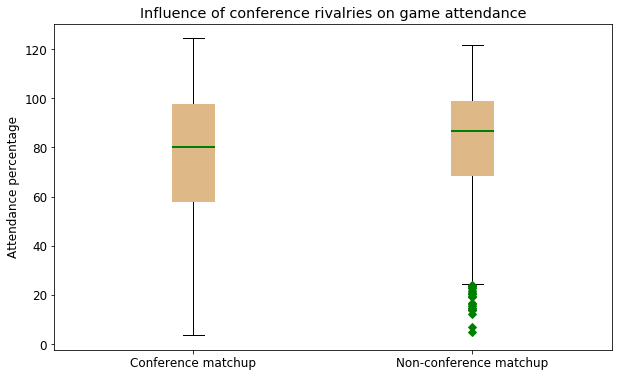

In [11]:
conference_matchups = attendance_data[attendance_data["conference_game"]]["attendance_percentage"]
non_conference_matchups = attendance_data[attendance_data["conference_game"] == False]["attendance_percentage"]

data = [conference_matchups, non_conference_matchups]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Conference matchup", "Non-conference matchup"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of conference rivalries on game attendance")
plt.savefig("visuals/conference_indicator.jpg")
plt.show()

And I will also run another t-test on the 2 populations:

In [12]:
t, p = ttest_ind(conference_matchups, non_conference_matchups, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,3.167358e-17,-8.475536


Again, the t-test produces a result significant at a 0.001 level. However, in this case it appears my hypothesis was rejected. While the populations do appear different, consistent with the p-value, it appears from the boxplot that non-conference matchups attract larger crowds. I anticipate this is somewhat due to the fact the majority of games are conference matchups so there are more opportunities for low attendances.

--------------------------
### *H5. Games with a temperate kickoff temperature will have higher percentages of attendance than those with extremely high or extremely low temperatures.*

Having sat through some miserably hot and frigidly cold football games in the past, I expected temperature to have a large effect on attendance. I anticipated we would see an inverse parabolic shape with lower attendances in extremely hot or extremely cold temperatures. 

Since I was unable to get temperatures from actual kickoff times, I will plot the maximum temperature on the day of the game and the minimum temperature on the day of the game against the attendance percentage.

To do so, I plot the maximum temperatures and then use [matplotlib's polyfit function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) to fit the best line to the data in green:

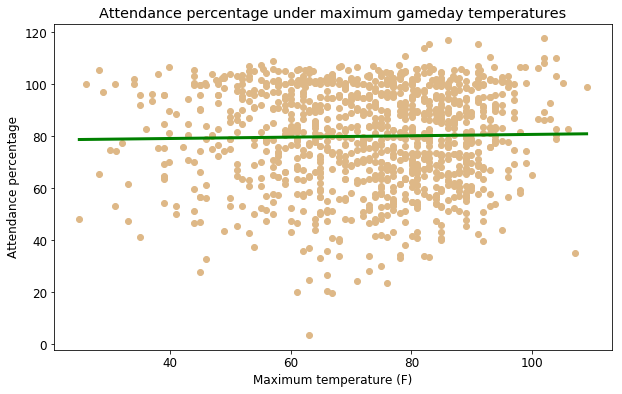

In [13]:
max_temp_attendance = attendance_data[attendance_data["max_temp"] >= 0]

plt.figure(figsize=(10,6))
plt.plot(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], "o", color="burlywood")
# least squares polyfit line to the data
plt.plot(np.unique(max_temp_attendance["max_temp"]), np.poly1d(np.polyfit(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], 1))(np.unique(max_temp_attendance["max_temp"])), color="green", linewidth=3)

plt.title("Attendance percentage under maximum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Maximum temperature (F)")
plt.savefig("visuals/max_temp_vs_attendance.jpg")
plt.show()

I will do this for the minimum temperature on gameday as well:

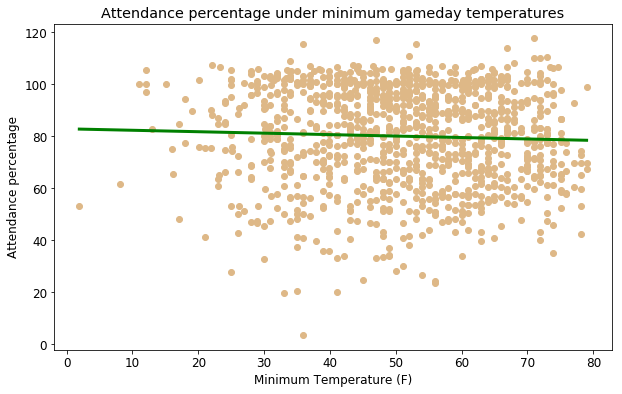

In [14]:
min_temp_attendance = attendance_data[attendance_data["min_temp"] >= -10]

plt.figure(figsize=(10,6))
plt.plot(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], "o", color="burlywood")
# least squares polyfit line to the data
plt.plot(np.unique(min_temp_attendance["min_temp"]), np.poly1d(np.polyfit(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], 1))(np.unique(min_temp_attendance["min_temp"])), color="green", linewidth=3)

plt.title("Attendance percentage under minimum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Minimum Temperature (F)")
plt.savefig("visuals/min_temp_vs_attendance.jpg")
plt.show()

We see essentially no trend for either the minimum or maximum temperatures. The attendance percentages are essentially uniformly distributed throughout all temperatures on both plots. The best fit line is essentially horizontal, also suggesting no relationship. These results disprove my hypothesis and suggest that gameday temperature actually has no influence on game attendance. Some of this is likely due to the fact that neither plot accurately represents actual game time conditions since kickoff times can be early or late in the day when neither the maximum or minimum temperature is in effect. Additionally, the quality of the matchup might be a confounding factor as people may be more likely to show up in inclement weather if the teams are performing well, etc. This also does not include details on if fans stayed for the majority of the game as in gross conditions [fans often leave early, especially if the game is not close](https://ftw.usatoday.com/2019/09/nick-saban-alabama-football-weather-heat-attendance-sec-kickoff-times) which may inflate what we perceive as attendance as well.

-----------------------
### H6. *Games without rain will have higher percentages of attendance than those with rain.*

Along with the temperature, I anticipated rain may influence attendance as well. Most college football stadiums are open air so the majority of the fans are completely exposed to the elements. 

To answer this question, I again create boxplots for the 2 populations to compare the differences:

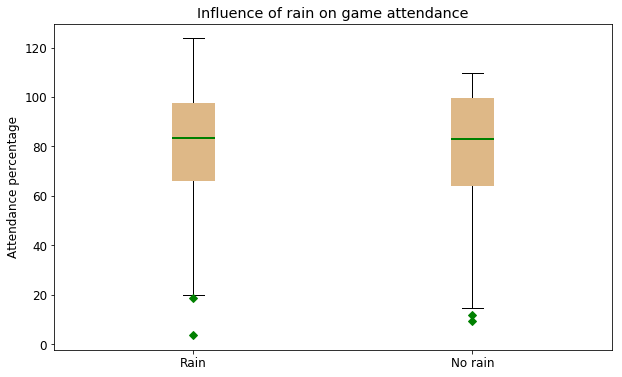

In [15]:
attendance_with_rain = attendance_data[attendance_data["rain"] == 0]["attendance_percentage"]
attendance_without_rain = attendance_data[attendance_data["rain"] > 0]["attendance_percentage"]

data = [attendance_with_rain, attendance_without_rain]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Rain", "No rain"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of rain on game attendance")
plt.savefig("visuals/rain_indicator.jpg")
plt.show()

And once more we can run a t-test on this data:

In [16]:
t, p = ttest_ind(attendance_with_rain, attendance_without_rain, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,0.954797,0.056703


While the lowest attendance percentage games occur in the presence of rain, there is essentially no difference in the bulk of the attendance percentages between games in rain and games that are dry. Again, this may be partially due to kickoff time conditions being different than the whole day or people leaving early but either way this hypothesis is not proven and rain appears to have no real affect.

-------------------------

## Discussion and implications

There are still many factors to look at before a conclusion is reached regarding the cause of declining attendance. While my research suggests that team success and stadium capacity largely  influence attendance, there is much more that should be looked at before athletic departments go out and build giant stadiums in an effort to improve attendance. This does however provide a starting place for future investigations.

This analysis fails to account for availability of internet inside the stadium, ease of stadium access, ticket price, and other factors that were discussed above as possible contributors to the attendance decline. I think future work could build on this study by bringing in more data with details such as game cost and commute data to create a more comprehensive view of the situations for fans when attendance is high and what it is low. These findings could be turned over to conference commissioners, NCAA heads or program athletic directors to allow them to develop some actionable takeaways from the findings.

My analysis of rain and its affect on attendance does not include snow, hail or other types of precipitation. This may be needed to build a more accurate picture of gameday conditions experienced by fans.

Additionally, this analysis only covers the 2012-2018 seasons. The 2019 season was the [150th year of college football](https://cfb150.org/) so there is clearly much more data that could be looked at. More work could be done to gather attendance data prior to 2012 which would allow more of a time series view to see how other variables have changed with attendance over time.

----------------

## Conclusion

I looked at the question of what factors drive attendance at college football games from many angles. I hypothesized that larger stadiums would have higher attendance percentages and the two tables I generated to look at this were largely consistent with this expectation. I hypothesized that the success of both teams playing in the game would have a positive impact on attendance.  My analysis showed that success of both the home and visiting team have a huge, and statistically significant at a 0.001 cutoff, impact on attendance, therefore consistent with both those hypotheses. I next expected that games with 2 teams from the same conference would have higher percentages of attendance than non-conference games. My investigation revealed that this was not the case and that in fact the median attendance percentage is higher for non-conference games. I finally wanted to look at weather and the influence it would have on game attendance. I hypothesized that temperature would be a large factor, specifically that temperate gameday temperatures would have higher attendances than games with extremely hot or extremely cold conditions. However, my analysis was not consistent with this expectation. Instead, there was essentially no relationship between temperature and attendance. While I was unable to gather data at a granular enough level to look at conditions exactly during kickoff, I looked at both minimum and maximum gameday temperatures which should cover most of the daily variability and neither showed an influence on attendance. I also looked at the impact of rain, specifically hypothesizing that games with rainy conditions would experience lower attendances. Again, this hypothesis was disproven and there is no noticeable or statistically significant difference between attendance percentages for games with and without rain.

As mentioned above, there are several caveats to this analysis. First, each hypothesis was looked at in isolation when in fact there may be interactions between multiple factors. For example, fans may be more likely to attend a game when their team is ranked and it is raining than a game when their team is unranked and it is raining. Additionally, many other variables may be at play. Stadiums located in large cities with populations of alumni and other fans nearby may have an artificial lift to attendance not captured directly in this data. Other factors such as program budget and school size may also influence attendance in ways not captured by this analysis. Overall, this initial analysis shows that team success, non-conference matchups and stadium size emerged as strong drivers of attendance while weather does not seem to have much influence on the number of fans that show up to watch the game.

To me, human-centered data science is about identifying factors that are important to people and using data science techniques to make things better. In this case I think the decline of attendance can identify things that matter to fans and the athletic marketing apartment can use this to influence strategies and focus more on attracting fans to games that may otherwise experience lower attendances. Improving the attendance at games has positive impacts on the fans, the team and the athletic department and therefore is an important problem to solve and hopefully this work sets a good analytical starting point for further investigaion on this topic.

A large aspect of human-centered data science is addressing bias. While the data used for this analysis is not subjective, it is important to note that bias may still be present through the questions, hypotheses and analysis techniques. 

-------------------

## References

All references are included as in-line linked citations.